In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from  utils import *

# Informações Gerais

In [2]:
path = "DadosRebeca.csv"
df = pd.read_csv(path)

In [3]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NOME_ALUNO         2458 non-null   object 
 1   SEXO               2458 non-null   object 
 2   IDADE              2451 non-null   float64
 3   ESTADO_CIVIL       2434 non-null   object 
 4   ETNIA              2458 non-null   object 
 5   COD_CURSO          2458 non-null   int64  
 6   NOME_CURSO         2458 non-null   object 
 7   ANO_INGRESSO       2458 non-null   int64  
 8   FORMA_INGRESSO     2458 non-null   object 
 9   PERIODO_INGRESSO   2458 non-null   object 
 10  ANO_EVASAO         2458 non-null   int64  
 11  PERIODO_EVASAO     1609 non-null   object 
 12  FORMA_EVASAO       2458 non-null   object 
 13  NUM_PERIODOS       2458 non-null   int64  
 14  NUM_MAX_PERIODOS   2458 non-null   int64  
 15  CH_TOTAL_CURSO     2458 non-null   int64  
 16  COTISTA            2458 

In [5]:
df.columns

Index(['NOME_ALUNO', 'SEXO', 'IDADE', 'ESTADO_CIVIL', 'ETNIA', 'COD_CURSO',
       'NOME_CURSO', 'ANO_INGRESSO', 'FORMA_INGRESSO', 'PERIODO_INGRESSO',
       'ANO_EVASAO', 'PERIODO_EVASAO', 'FORMA_EVASAO', 'NUM_PERIODOS',
       'NUM_MAX_PERIODOS', 'CH_TOTAL_CURSO', 'COTISTA', 'MUNICIPIO', 'ESTADO',
       'PAIS', 'CRN', 'CRA', 'QTDE_TRANCAMENTOS', 'TEMPO_NA_UFES'],
      dtype='object')

In [6]:
sns.set_theme(style="whitegrid", palette="pastel")
palette ={"M": "C0", "F": "C1"}

In [7]:
df["FORMA_INGRESSO"].loc[df.FORMA_INGRESSO == "Transferência ex-oficio (direito legal)"] = "Transferência ex-oficio \n (direito legal)"

C:\Users\USER\AppData\Local\Temp\ipykernel_22848\3068537451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FORMA_INGRESSO"].loc[df.FORMA_INGRESSO == "Transferência ex-oficio (direito legal)"] = "Transferência ex-oficio \n (direito legal)"


In [8]:
df["ESTADO_CIVIL"].loc[df.ESTADO_CIVIL == "Separado Judicialmente"] = "Separado(a) Judicialmente"

C:\Users\USER\AppData\Local\Temp\ipykernel_22848\2789806604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ESTADO_CIVIL"].loc[df.ESTADO_CIVIL == "Separado Judicialmente"] = "Separado(a) Judicialmente"


In [9]:
cotistas = df[df['COTISTA'] == 'S']
masc = df[df['SEXO'] == 'M'] 
femi = df[df['SEXO'] == 'F']
cc_femi = femi[femi["COD_CURSO"] == 11]
eng_femi = femi[femi["COD_CURSO"] == 5]
cc_masc = masc[masc["COD_CURSO"] == 11]
eng_masc = masc[masc["COD_CURSO"] == 5]
eng = df[df['COD_CURSO'] == 5]
ccomp = df[df["COD_CURSO"] == 11]
formados = df[df["FORMA_EVASAO"] == "Formado"]
desistentes = df[df["FORMA_EVASAO"] == "Formado"]
cursando = df[df["FORMA_EVASAO"] == "Cursando"]
cursando_ec = cursando[cursando['COD_CURSO'] == 5]
cursando_cc = cursando[cursando['COD_CURSO'] == 11]
cotas_eng = cotistas[cotistas["COD_CURSO"] == 5]
cotas_cc = cotistas[cotistas["COD_CURSO"] == 11]
formados_cc = formados[formados["COD_CURSO"] == 11]
formados_ec = formados[formados["COD_CURSO"] == 5]

In [10]:
cc_femi.loc[cc_femi['ANO_INGRESSO']<2012]

,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,PERIODO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
1375,Aluno 1378,F,19.3,Solteiro(a),Branca,11,Ciência da Computação,2008,Vestibular,1º Semestre,...,16,2910,N,VITORIA,Espirito Santo,Brasil,"2,1257",1.99,1,4
1382,Aluno 1385,F,19.6,Solteiro(a),Branca,11,Ciência da Computação,2008,Vestibular,1º Semestre,...,16,2910,N,VILA VELHA,Espirito Santo,Brasil,"2,3949",2.39,0,4
1385,Aluno 1388,F,18.6,Solteiro(a),Branca,11,Ciência da Computação,2008,Vestibular,1º Semestre,...,16,2910,S,VENDA NOVA DO IMIGRANTE,Espirito Santo,Brasil,"2,7172",2.55,0,1
1393,Aluno 1396,F,21.8,Solteiro(a),Branca,11,Ciência da Computação,2008,Vestibular,1º Semestre,...,16,2910,S,Vila Velha,NaN,NaN,"0,6065",0.00,2,3
1397,Aluno 1400,F,19.2,Solteiro(a),Branca,11,Ciência da Computação,1996,Vestibular,1º Semestre,...,16,2910,N,VITORIA,NaN,Brasil,NaN,8.05,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Aluno 1940,F,20.3,Solteiro(a),Branca,11,Ciência da Computação,2009,Transferência Facultativa,2º Semestre,...,13,3590,N,VITORIA,Espirito Santo,Brasil,"4,217",4.92,1,6
1950,Aluno 1953,F,17.7,Solteiro(a),Branca,11,Ciência da Computação,2010,Vestibular,1º Semestre,...,13,3590,N,VILA VELHA,Espirito Santo,Brasil,"16,8162",9.07,0,4
1953,Aluno 1956,F,18.8,Solteiro(a),Branca,11,Ciência da Computação,2010,Vestibular,1º Semestre,...,13,3590,N,VILA VELHA,Espirito Santo,Brasil,"3,7151",4.17,0,4
1974,Aluno 1977,F,19.0,Solteiro(a),Parda,11,Ciência da Computação,2009,Vestibular,1º Semestre,...,13,3590,N,VILA VELHA,Espirito Santo,Brasil,"16,4647",8.34,0,4


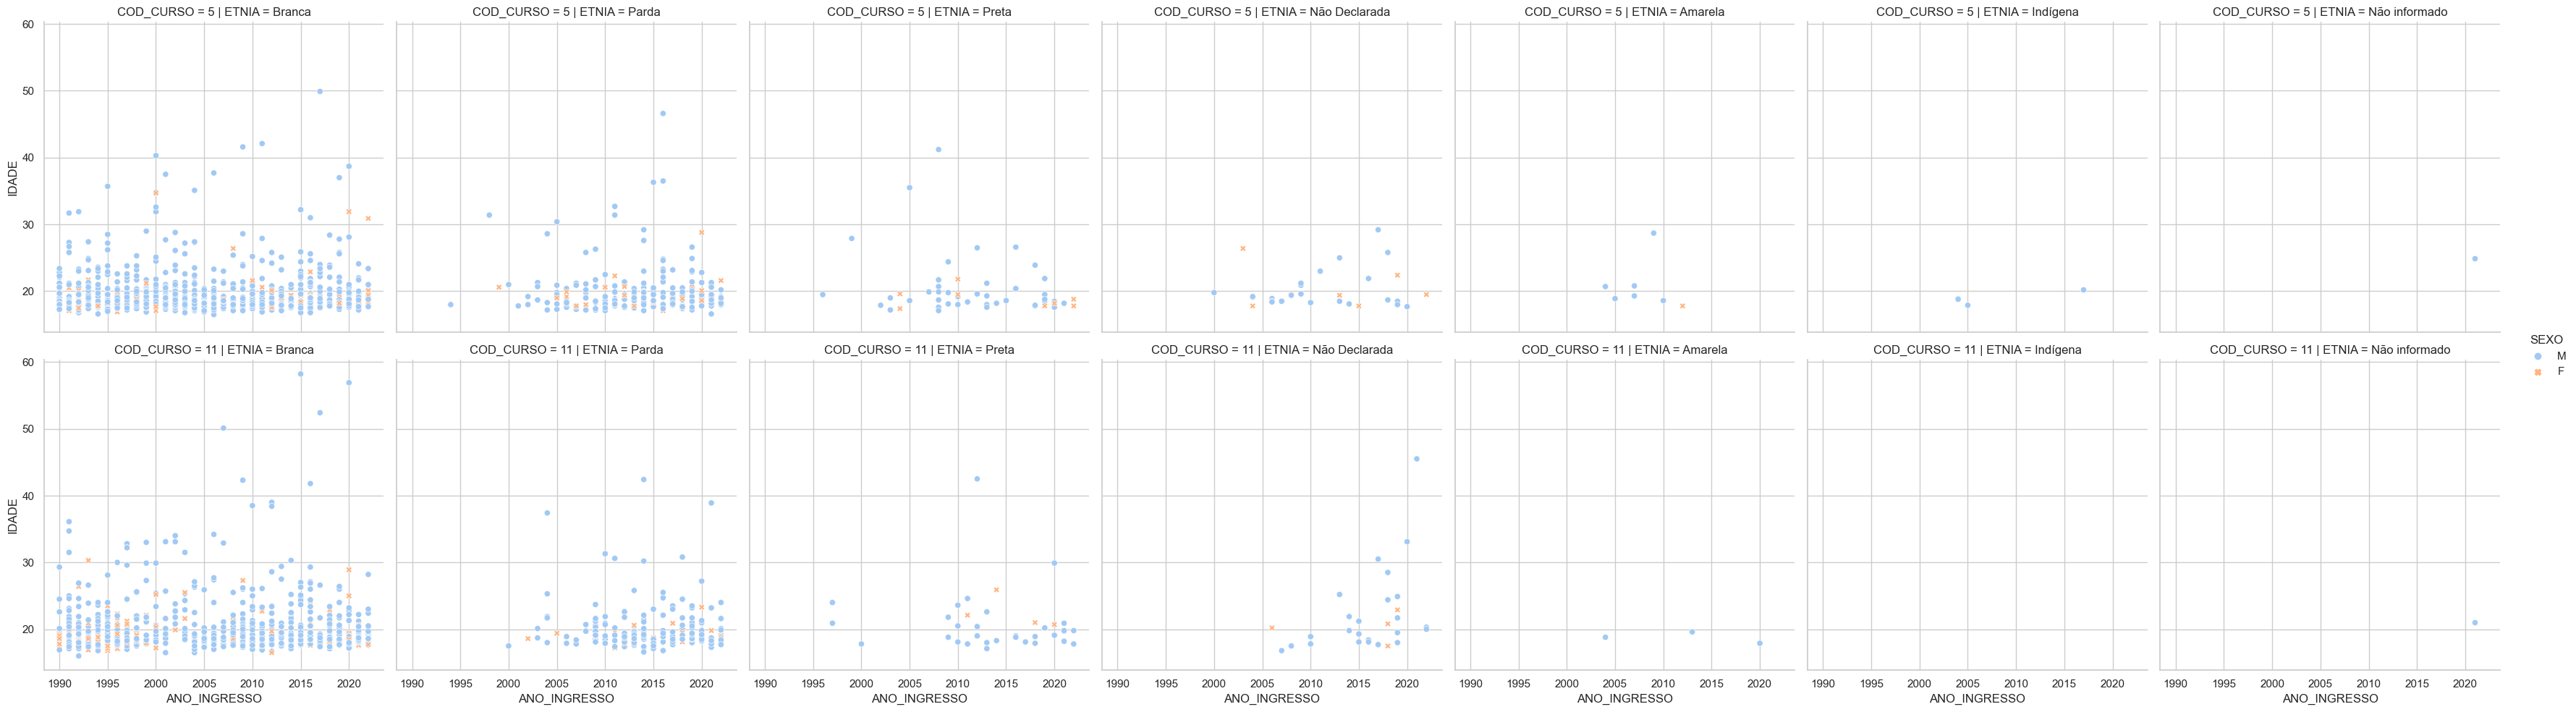

In [11]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE",col="ETNIA",hue="SEXO",row="COD_CURSO",style="SEXO")

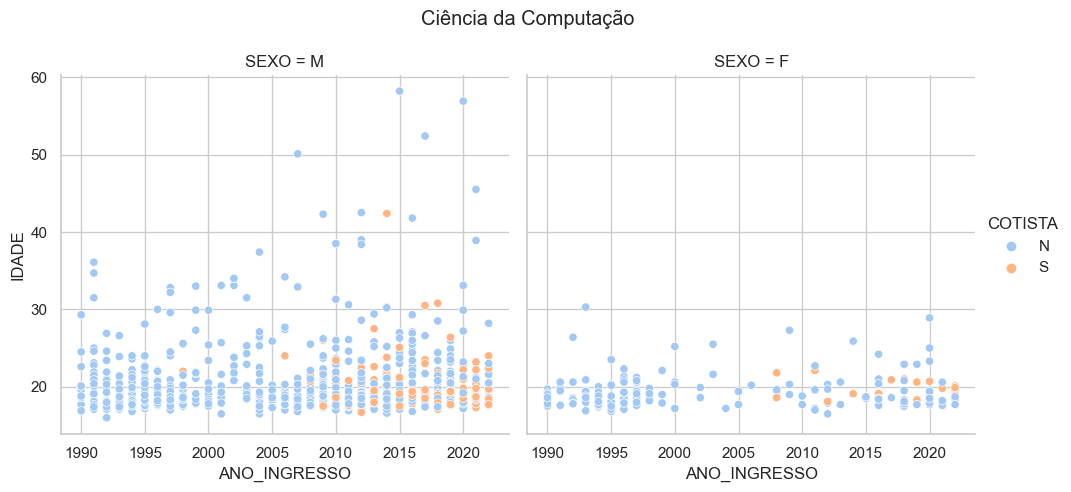

In [12]:
fig = sns.relplot(data=ccomp, x="ANO_INGRESSO",y="IDADE",col='SEXO',hue="COTISTA")
fig.fig.suptitle("Ciência da Computação")
fig.fig.subplots_adjust(top=0.85);


In [13]:
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="SEXO",hue="ETNIA",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="ETNIA",hue="SEXO",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",hue="Forna de Evasão",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="COD_CURSO",hue="SEXO")
#sns.displot(df, x="ANO_INGRESSO", hue="Forna de Evasão", kind="ecdf",col="SEXO")
#sns.displot(df, x="CRA", hue="Forna de Evasão", kind="ecdf",col="SEXO")

# Perfil

In [14]:
eng_femi.mode()

,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,PERIODO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,Aluno 1007,F,17.8,Solteiro(a),Branca,5.0,Engenharia de Computação,2022.0,Vestibular,1º Semestre,...,15.0,3690.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,3.0
1,Aluno 1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,Aluno 1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aluno 1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aluno 1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Aluno 970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,Aluno 983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Aluno 984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,Aluno 985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
eng_masc.mode()

,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,PERIODO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,Aluno 1,M,18.1,Solteiro(a),Branca,5.0,Engenharia de Computação,2016.0,Vestibular,1º Semestre,...,18.0,3690.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,Aluno 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aluno 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aluno 1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aluno 1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Aluno 995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,Aluno 996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1209,Aluno 997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210,Aluno 998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
cc_femi.mode()

,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,PERIODO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,Aluno 1378,F,18.5,Solteiro(a),Branca,11.0,Ciência da Computação,1995.0,Vestibular,1º Semestre,...,16.0,2910.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,Aluno 1385,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aluno 1388,NaN,NaN,NaN,NaN,NaN,NaN,1997.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aluno 1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aluno 1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Aluno 2393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,Aluno 2396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Aluno 2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,Aluno 2452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cc_masc.mode()

,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,PERIODO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,Aluno 1377,M,17.8,Solteiro(a),Branca,11.0,Ciência da Computação,2009.0,Vestibular,1º Semestre,...,13.0,3590.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,Aluno 1379,NaN,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aluno 1380,NaN,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aluno 1381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aluno 1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,Aluno 2457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,Aluno 2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,Aluno 2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,Aluno 2460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Distribuição de Gêneros

In [18]:
cc_femi['ANO_INGRESSO'].describe()

count     182.000000
mean     2003.934066
std        10.970379
min      1990.000000
25%      1995.000000
50%      1998.000000
75%      2016.000000
max      2022.000000
Name: ANO_INGRESSO, dtype: float64

In [19]:
eng_femi['ANO_INGRESSO'].describe()

count     162.00000
mean     2008.41358
std         9.95371
min      1990.00000
25%      2000.00000
50%      2010.00000
75%      2017.75000
max      2022.00000
Name: ANO_INGRESSO, dtype: float64

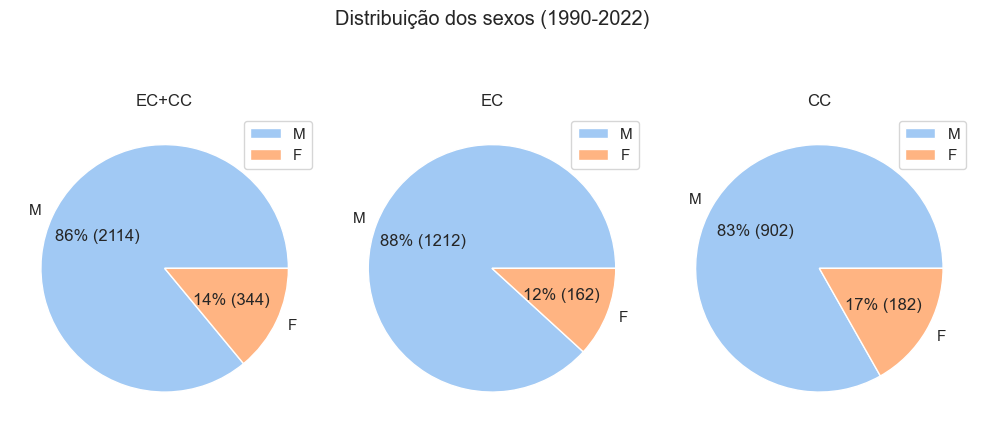

In [20]:
create_subplots([df,eng, ccomp], ['SEXO', 'SEXO', 'SEXO'],
                ["EC+CC","EC",'CC'], maintitle ='Distribuição dos sexos (1990-2022)',
                figsize=(10,5))

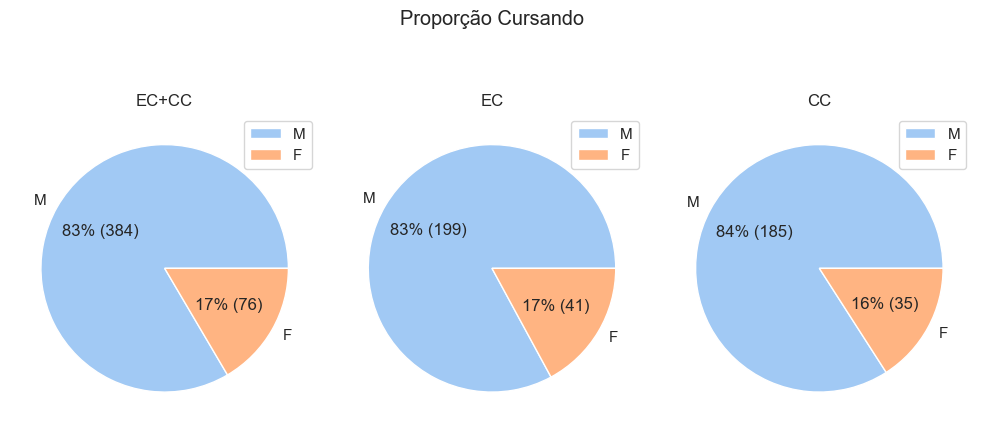

In [21]:
create_subplots([cursando,cursando_ec, cursando_cc,], ['SEXO', 'SEXO', 'SEXO'], 
                ['EC+CC','EC','CC'], maintitle="Proporção Cursando",figsize=(10,5))

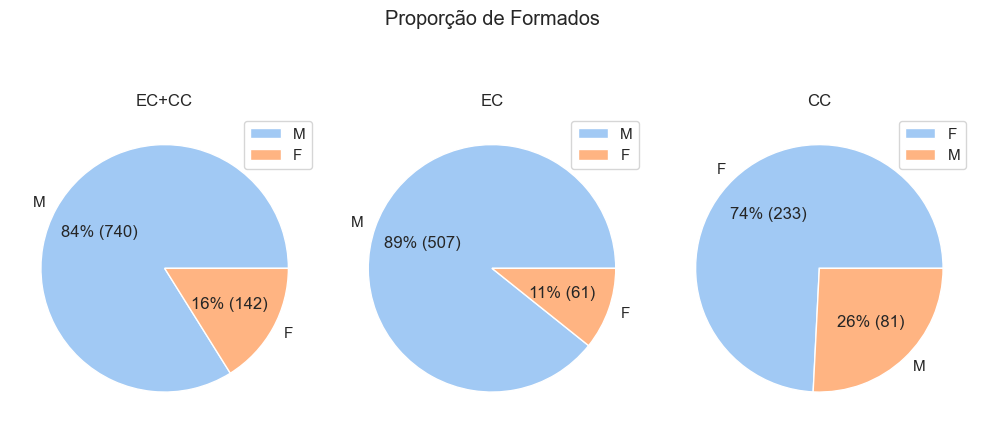

In [22]:
create_subplots([formados,formados_ec,formados_cc],['SEXO', 'SEXO', 'SEXO'], 
                ["EC+CC","EC",'CC'], "Proporção de Formados",figsize=(10,5))

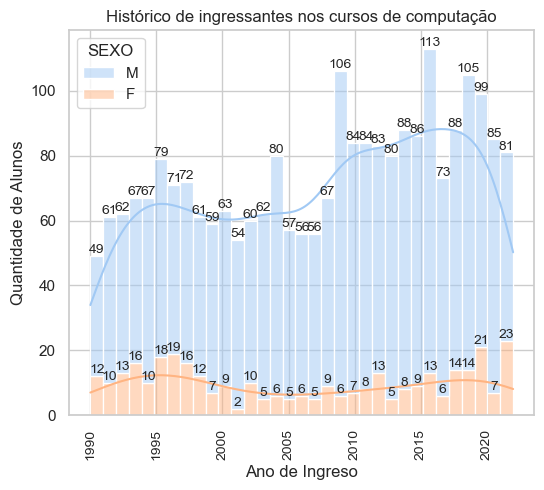

In [23]:
hist_plot(df, 'ANO_INGRESSO', 'Ano de Ingreso', 'Histórico de ingressantes nos cursos de computação', paleta=palette)

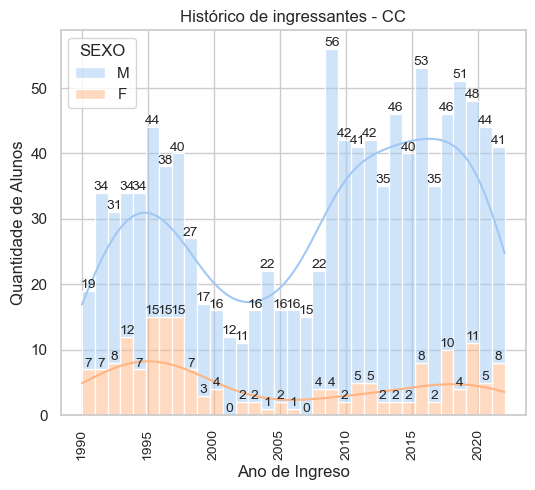

In [24]:
hist_plot(ccomp, 'ANO_INGRESSO', 'Ano de Ingreso', 'Histórico de ingressantes - CC', paleta=palette)

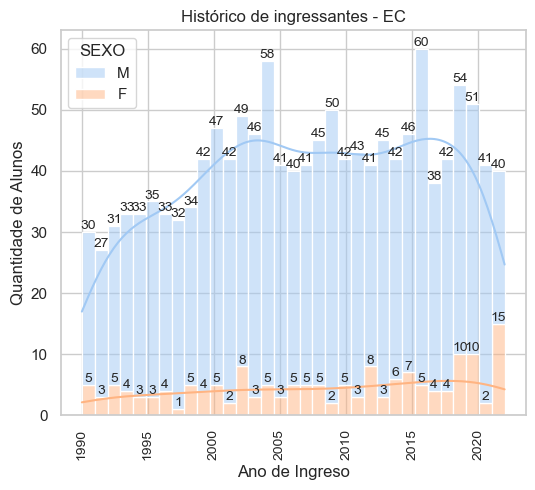

In [25]:
hist_plot(eng, 'ANO_INGRESSO', 'Ano de Ingreso', 'Histórico de ingressantes - EC', paleta=palette)

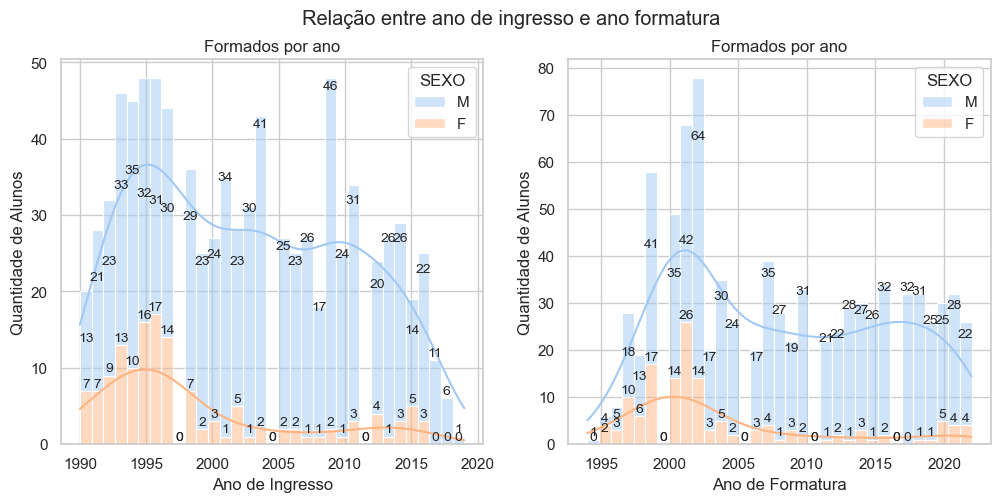

In [26]:
mutiple_hist_plots(formados, formados, col1_name='ANO_INGRESSO', col2_name='ANO_EVASAO',
                   title1="Formados por ano", title2="Formados por ano", 
                   maintitle='Relação entre ano de ingresso e ano formatura',
                   xlabel1='Ano de Ingresso', xlabel2='Ano de Formatura',
                   ylabel1='Quantidade de Alunos',ylabel2= 'Quantidade de Alunos',
                   hue='SEXO', paleta=palette, figsize=(12,5))

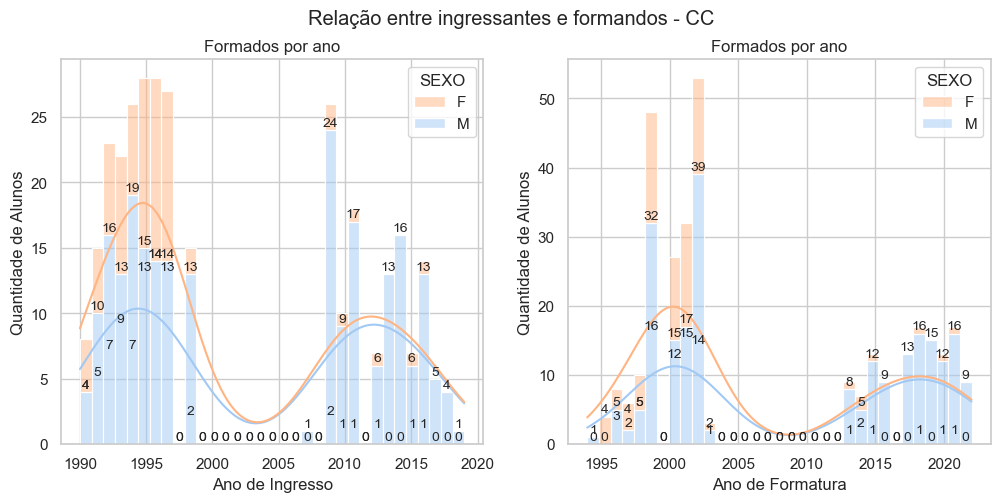

In [27]:
mutiple_hist_plots(formados_cc, formados_cc, col1_name='ANO_INGRESSO', col2_name='ANO_EVASAO',
                   title1="Formados por ano", title2="Formados por ano", 
                   maintitle='Relação entre ingressantes e formandos - CC',
                   xlabel1='Ano de Ingresso', xlabel2='Ano de Formatura',
                   ylabel1='Quantidade de Alunos',ylabel2= 'Quantidade de Alunos',
                   hue='SEXO', paleta=palette, figsize=(12,5))

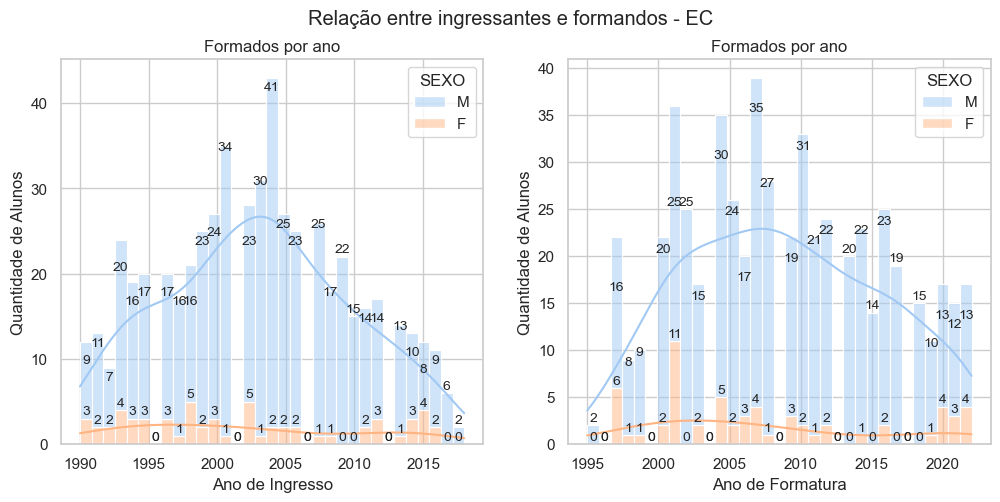

In [28]:
mutiple_hist_plots(formados_ec, formados_ec, col1_name='ANO_INGRESSO', col2_name='ANO_EVASAO',
                   title1="Formados por ano", title2="Formados por ano", 
                   maintitle='Relação entre ingressantes e formandos - EC',
                   xlabel1='Ano de Ingresso', xlabel2='Ano de Formatura',
                   ylabel1='Quantidade de Alunos',ylabel2= 'Quantidade de Alunos',
                   hue='SEXO', paleta=palette, figsize=(12,5))

# Desempenho acadêmico

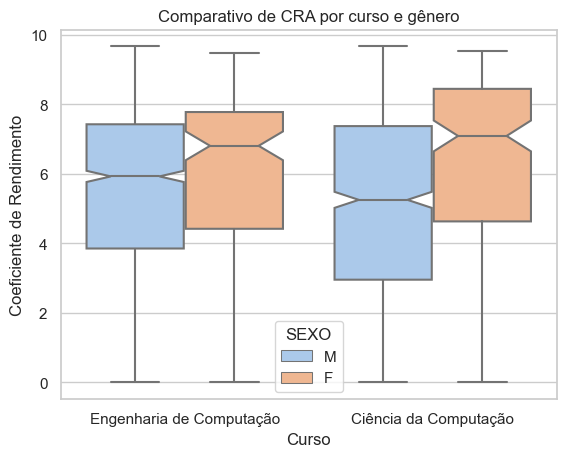

In [31]:
plot_boxplot(x='NOME_CURSO', y='CRA', hue='SEXO', data=df, 
             xlabel='Curso', ylabel='Coeficiente de Rendimento', title='Comparativo de CRA por curso e gênero', notch=True)

In [ ]:
print('---Geral---')
print('Feminino:')
print(femi[femi['CRA']>0]['CRA'].describe())
print("Masculino:")
print(masc[masc['CRA']>0]['CRA'].describe())
print('---Eng Comp---')
print('Feminino:')
print(eng_femi[eng_femi['CRA']>0]['CRA'].describe())
print("Masculino:")
print(eng_masc[eng_masc['CRA']>0]['CRA'].describe())
print('---CComp---')
print('Feminino:')
print(cc_femi[cc_femi['CRA']>0]['CRA'].describe())
print("Masculino:")
print(cc_masc[cc_masc['CRA']>0]['CRA'].describe())

---Geral---
Feminino:
count    317.000000
mean       6.486309
std        2.204328
min        0.070000
25%        4.950000
50%        7.100000
75%        8.180000
max        9.540000
Name: CRA, dtype: float64
Masculino:
count    1972.000000
mean        5.616678
std         2.311786
min         0.030000
25%         4.027500
50%         5.925000
75%         7.492500
max         9.670000
Name: CRA, dtype: float64
---Eng Comp---
Feminino:
count    153.000000
mean       6.153922
std        2.206592
min        0.070000
25%        4.560000
50%        6.890000
75%        7.810000
max        9.480000
Name: CRA, dtype: float64
Masculino:
count    1146.000000
mean        5.731710
std         2.219117
min         0.030000
25%         4.300000
50%         6.090000
75%         7.480000
max         9.670000
Name: CRA, dtype: float64
---CComp---
Feminino:
count    164.000000
mean       6.796402
std        2.163125
min        1.010000
25%        5.617500
50%        7.410000
75%        8.567500
max      

In [ ]:
print('---Geral---')
print('Feminino:')
print(femi['CRA'].median())
print("Masculino:")
print(masc['CRA'].median())
print('---Eng Comp---')
print('Feminino:')
print(eng_femi['CRA'].median())
print("Masculino:")
print(eng_masc['CRA'].median())
print('---CComp---')
print('Feminino:')
print(cc_femi['CRA'].median())
print("Masculino:")
print(cc_masc['CRA'].median())

---Geral---
Feminino:
6.905
Masculino:
5.66
---Eng Comp---
Feminino:
6.8100000000000005
Masculino:
5.93
---CComp---
Feminino:
7.095
Masculino:
5.255


# Idade - Medidas de Centralidade

In [ ]:
df.groupby("SEXO")['IDADE'].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,342.0,19.331871,2.305408,16.5,18.0,18.7,19.8,34.7
M,2109.0,20.079943,3.865220,16.0,18.1,18.9,20.4,58.2


In [ ]:
df.groupby("SEXO")['IDADE'].median()

SEXO
F    18.7
M    18.9
Name: IDADE, dtype: float64

In [ ]:
df.groupby(["SEXO", 'NOME_CURSO'])['IDADE'].median()

SEXO  NOME_CURSO              
F     Ciência da Computação       18.8
      Engenharia de Computação    18.6
M     Ciência da Computação       19.1
      Engenharia de Computação    18.7
Name: IDADE, dtype: float64

In [ ]:
df.groupby(["SEXO", 'NOME_CURSO'])['IDADE'].describe()

count       mean       std   min   25%   50%  \
SEXO NOME_CURSO                                                                
F    Ciência da Computação      180.0  19.408333  2.160744  16.5  18.1  18.8   
     Engenharia de Computação   162.0  19.246914  2.460172  16.9  18.0  18.6   
M    Ciência da Computação      899.0  20.509677  4.421048  16.0  18.1  19.1   
     Engenharia de Computação  1210.0  19.760661  3.360352  16.5  18.0  18.7   

                                75%   max  
SEXO NOME_CURSO                            
F    Ciência da Computação     20.2  30.3  
     Engenharia de Computação  19.5  34.7  
M    Ciência da Computação     21.0  58.2  
     Engenharia de Computação  20.0  49.9

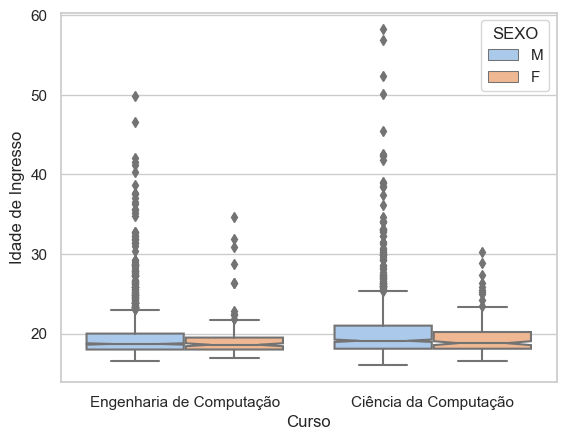

In [30]:
plot_boxplot(df, x='NOME_CURSO', y='IDADE', hue='SEXO',
             xlabel='Curso', ylabel='Idade de Ingresso', title='', notch=True)

# Tabelas de Contigência

## Forma de Ingresso

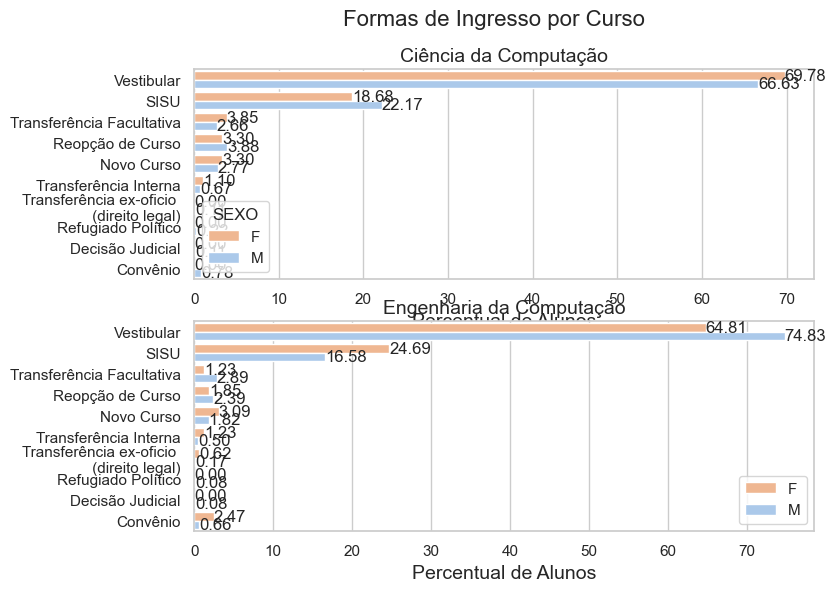

In [ ]:
comparative_bar_plots(ccomp, eng, 'FORMA_INGRESSO', paleta=palette, 
                      maintitle='Formas de Ingresso por Curso',figsize=(8,6))

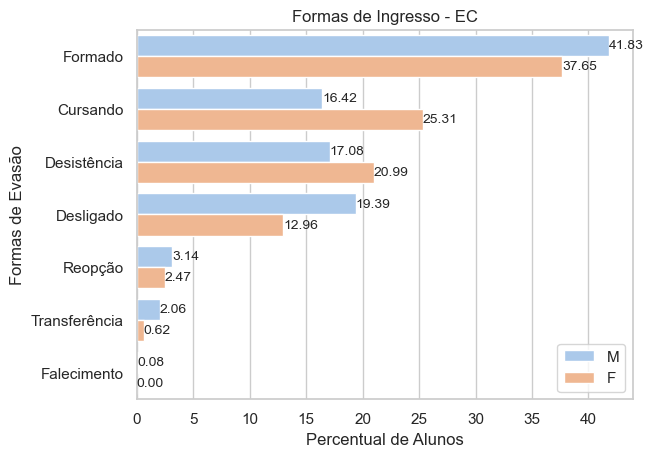

In [ ]:
single_bar_plot(eng, 'FORMA_EVASAO', "Formas de Ingresso - EC",
                paleta=palette,ylabel="Formas de Evasão")

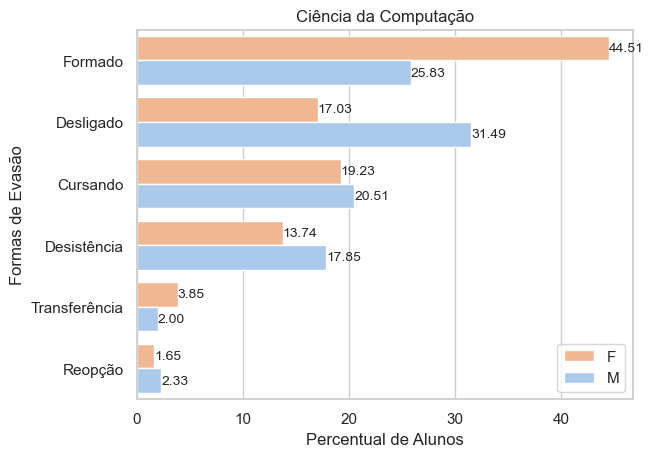

In [ ]:
single_bar_plot(ccomp, 'FORMA_EVASAO', "Ciência da Computação",
                paleta=palette,ylabel="Formas de Evasão")

## Forma de Evasão

### Geral

In [ ]:
tab_evasao, tabper_evasao = crosstabper(df,"FORMA_EVASAO")
tabper_evasao

SEXO,F,M
FORMA_EVASAO,,
Cursando,22.093023,18.164617
Desistência,17.151163,17.407758
Desligado,15.116279,24.550615
Falecimento,0.000000,0.047304
Formado,41.279070,35.004730
Reopção,2.034884,2.790918
Transferência,2.325581,2.034059


In [ ]:
testa_dependencia(tab_evasao)

p valor é 0.00636795474579937
Dependência (rejeita H0)


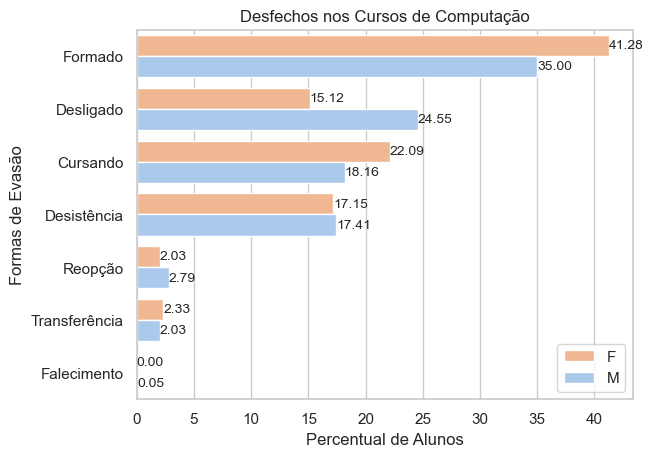

In [ ]:
single_bar_plot(df, 'FORMA_EVASAO', "Desfechos nos Cursos de Computação",
                paleta=palette,ylabel="Formas de Evasão")

### por Curso

In [ ]:

ec_tab_evasao, ec_tab_per_evasao = crosstabper(eng, 'FORMA_EVASAO')
cc_tab_evasao, cc_tab_per_evasao = crosstabper(ccomp, 'FORMA_EVASAO')

print("Ciência")
testa_dependencia(cc_tab_evasao)
print("Engenharia")
testa_dependencia(ec_tab_evasao)


Ciência
p valor é 3.2847192200085672e-06
Dependência (rejeita H0)
Engenharia
p valor é 0.03711882628015684
Dependência (rejeita H0)


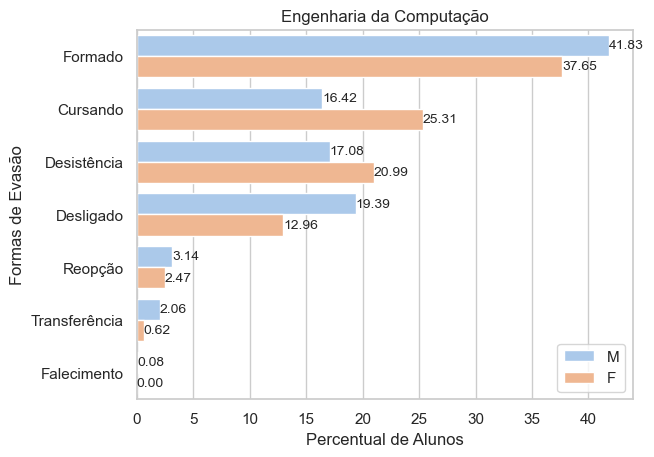

In [ ]:
single_bar_plot(eng, 'FORMA_EVASAO', "Engenharia da Computação",
                paleta=palette,ylabel="Formas de Evasão")

## Cotas

### Geral

In [ ]:
tab_cota, tabper_cota = crosstabper(df,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
N,82.848837,81.078524
S,17.151163,18.921476


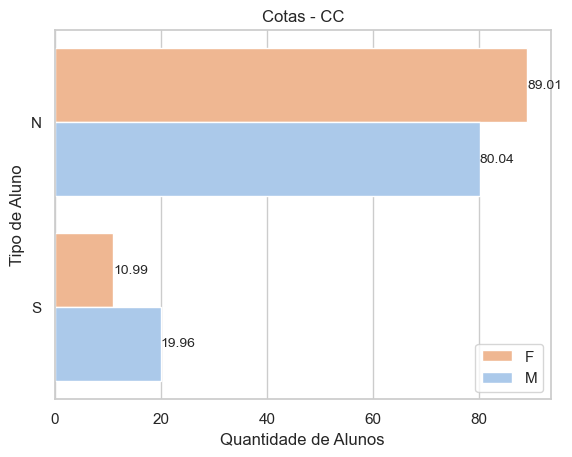

In [ ]:
single_bar_plot(ccomp, 'COTISTA', "Cotas - CC", paleta=palette, ylabel='Tipo de Aluno', xlabel='Quantidade de Alunos')

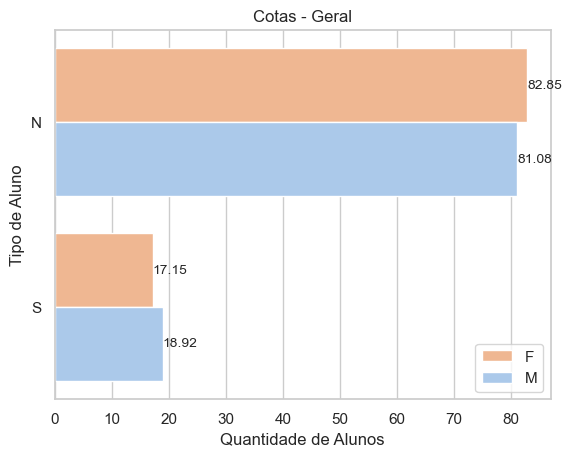

In [ ]:
single_bar_plot(df, 'COTISTA', "Cotas - Geral", paleta=palette, ylabel='Tipo de Aluno', xlabel='Quantidade de Alunos')

In [ ]:
testa_dependencia(tab_cota)

p valor é 0.47970145743024706
Independência


### Cotas - Por Curso

In [ ]:
cc_tab_cota, cc_tabper_cota = crosstabper(ccomp,"COTISTA")
cc_tabper_cota

SEXO,F,M
COTISTA,,
N,89.010989,80.044346
S,10.989011,19.955654


In [ ]:
eng_tab_cota, eng_tabper_cota = crosstabper(eng,"COTISTA")
eng_tabper_cota

SEXO,F,M
COTISTA,,
N,75.925926,81.848185
S,24.074074,18.151815


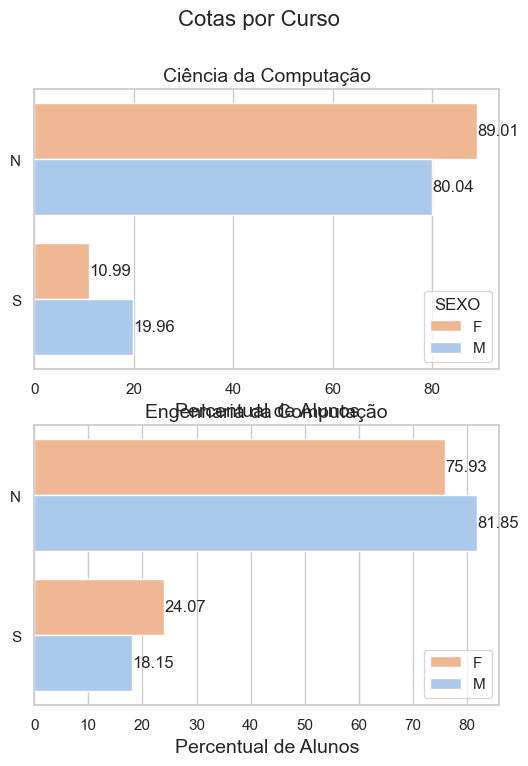

In [ ]:
comparative_bar_plots(ccomp, eng, column_name='COTISTA',
                       paleta=palette, maintitle="Cotas por Curso", figsize=(6,8))

In [ ]:
print("Ciência")
testa_dependencia(cc_tab_cota)
print("Engenharia")
testa_dependencia(eng_tab_cota)

Ciência
p valor é 0.006144041424037965
Dependência (rejeita H0)
Engenharia
p valor é 0.0885390085047568
Independência


## Etnia

### Geral

In [ ]:
tab_etnia, tabper_etnia = crosstabper(df,"ETNIA")
tabper_etnia

SEXO,F,M
ETNIA,,
Amarela,0.290698,0.425733
Branca,77.906977,75.638600
Indígena,0.000000,0.189215
Não Declarada,3.197674,2.223273
Não informado,0.000000,0.094607
Parda,15.116279,17.928098
Preta,3.488372,3.500473


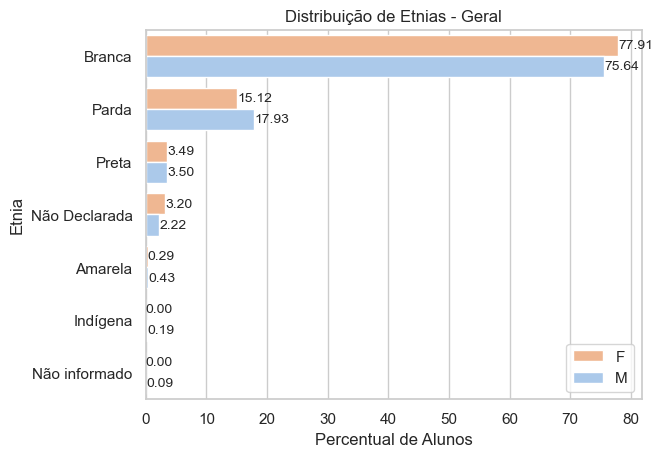

In [ ]:
single_bar_plot(df, 'ETNIA', 'Distribuição de Etnias - Geral', palette, 'Etnia')

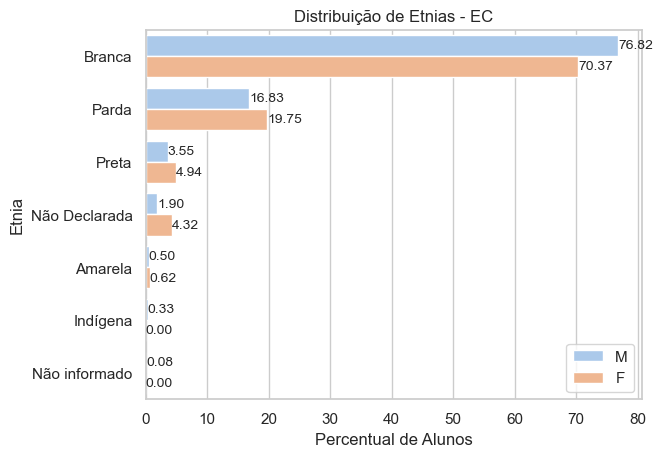

In [ ]:
single_bar_plot(eng, 'ETNIA', 'Distribuição de Etnias - EC', palette, 'Etnia')

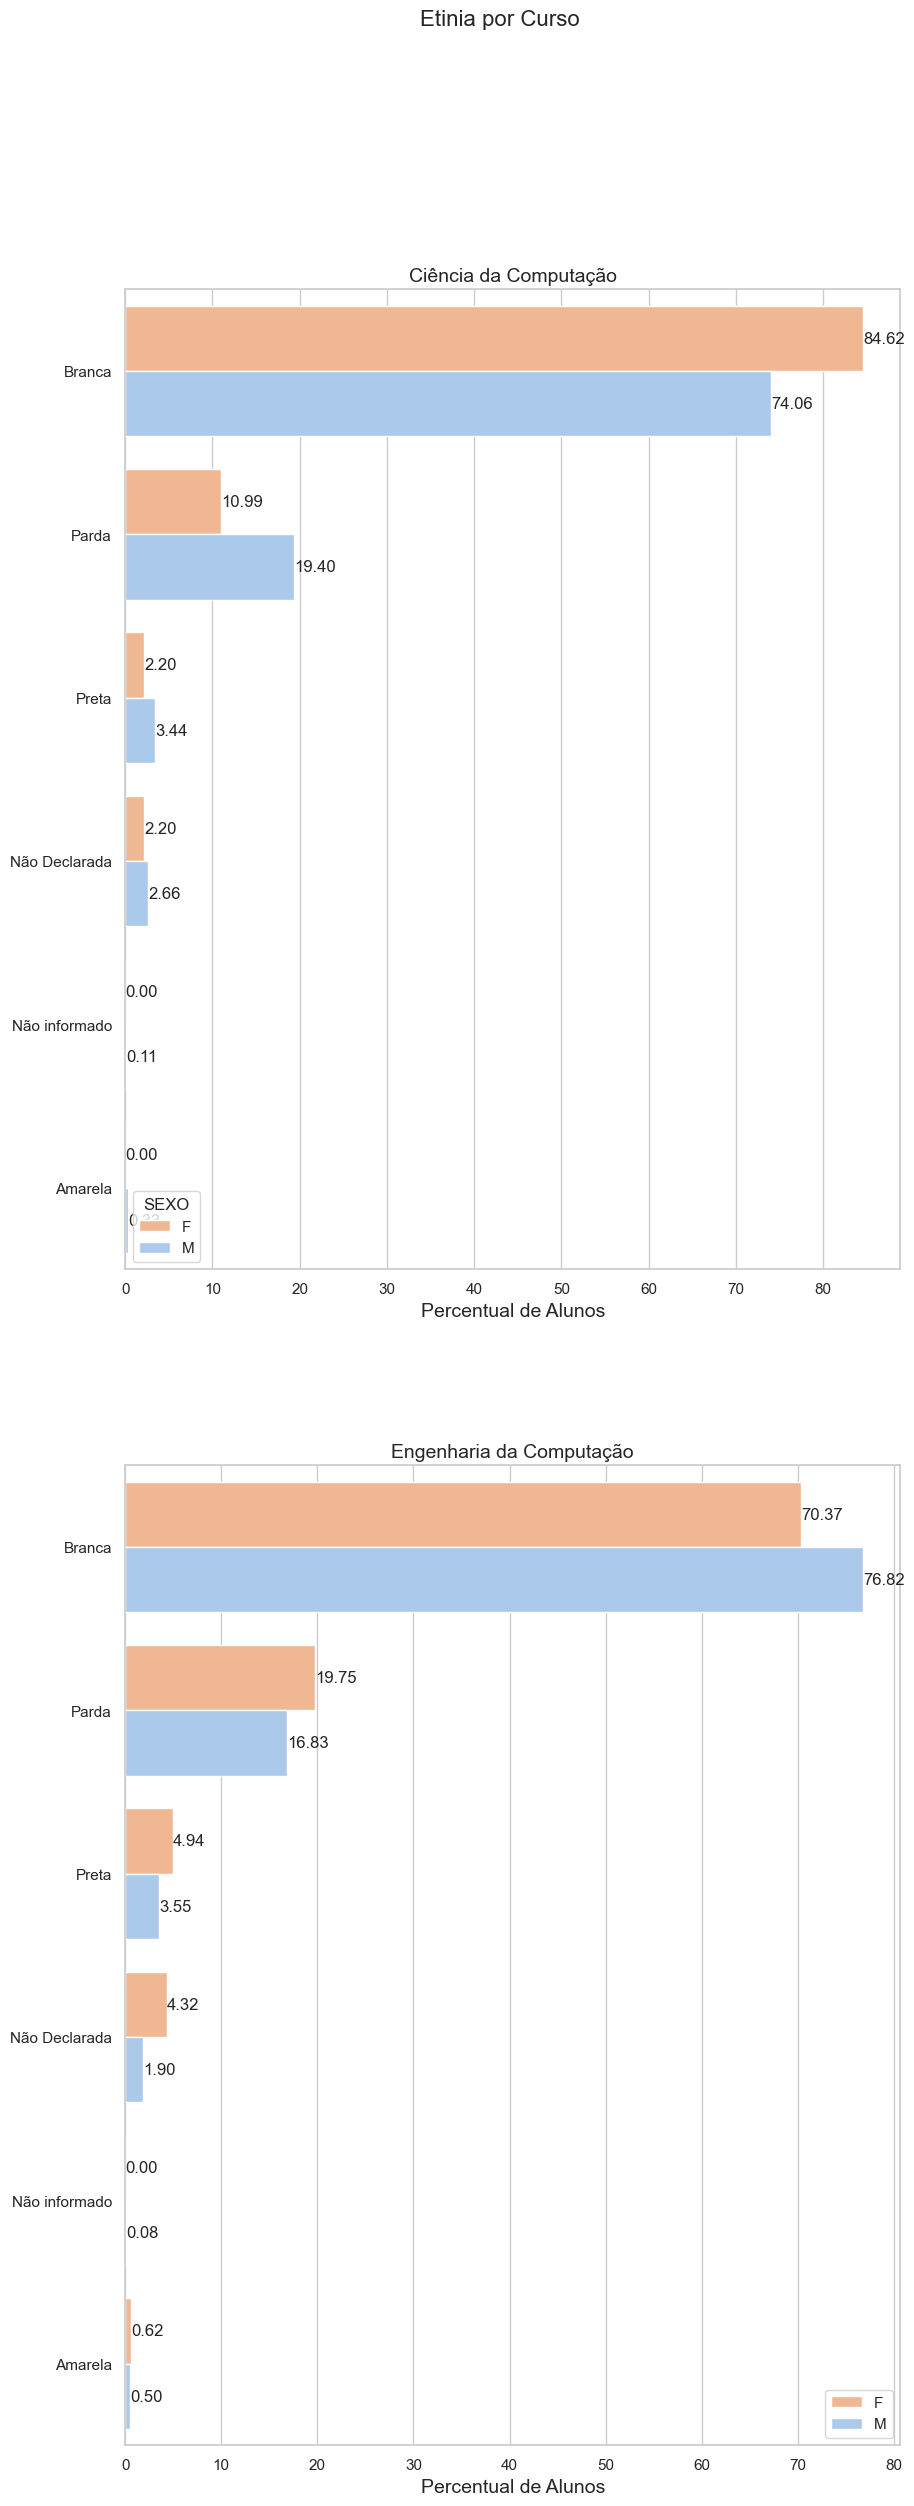

In [ ]:
comparative_bar_plots(ccomp, eng, column_name='ETNIA', paleta=palette, maintitle="Etinia por Curso")

In [ ]:
testa_dependencia(tabper_etnia)

p valor é 0.9931720529286797
Independência


### Por curso

In [ ]:
eng_tab_etnia, eng_tabper_etnia = crosstabper(eng,"ETNIA")
eng_tabper_etnia

SEXO,F,M
ETNIA,,
Amarela,0.617284,0.495050
Branca,70.370370,76.815182
Indígena,0.000000,0.330033
Não Declarada,4.320988,1.897690
Não informado,0.000000,0.082508
Parda,19.753086,16.831683
Preta,4.938272,3.547855


In [ ]:
cc_tab_etnia, cc_tabper_etnia = crosstabper(eng,"ETNIA")
cc_tabper_etnia

SEXO,F,M
ETNIA,,
Amarela,0.617284,0.495050
Branca,70.370370,76.815182
Indígena,0.000000,0.330033
Não Declarada,4.320988,1.897690
Não informado,0.000000,0.082508
Parda,19.753086,16.831683
Preta,4.938272,3.547855


ValueError: Distribuição de Etnias is not a valid palette name

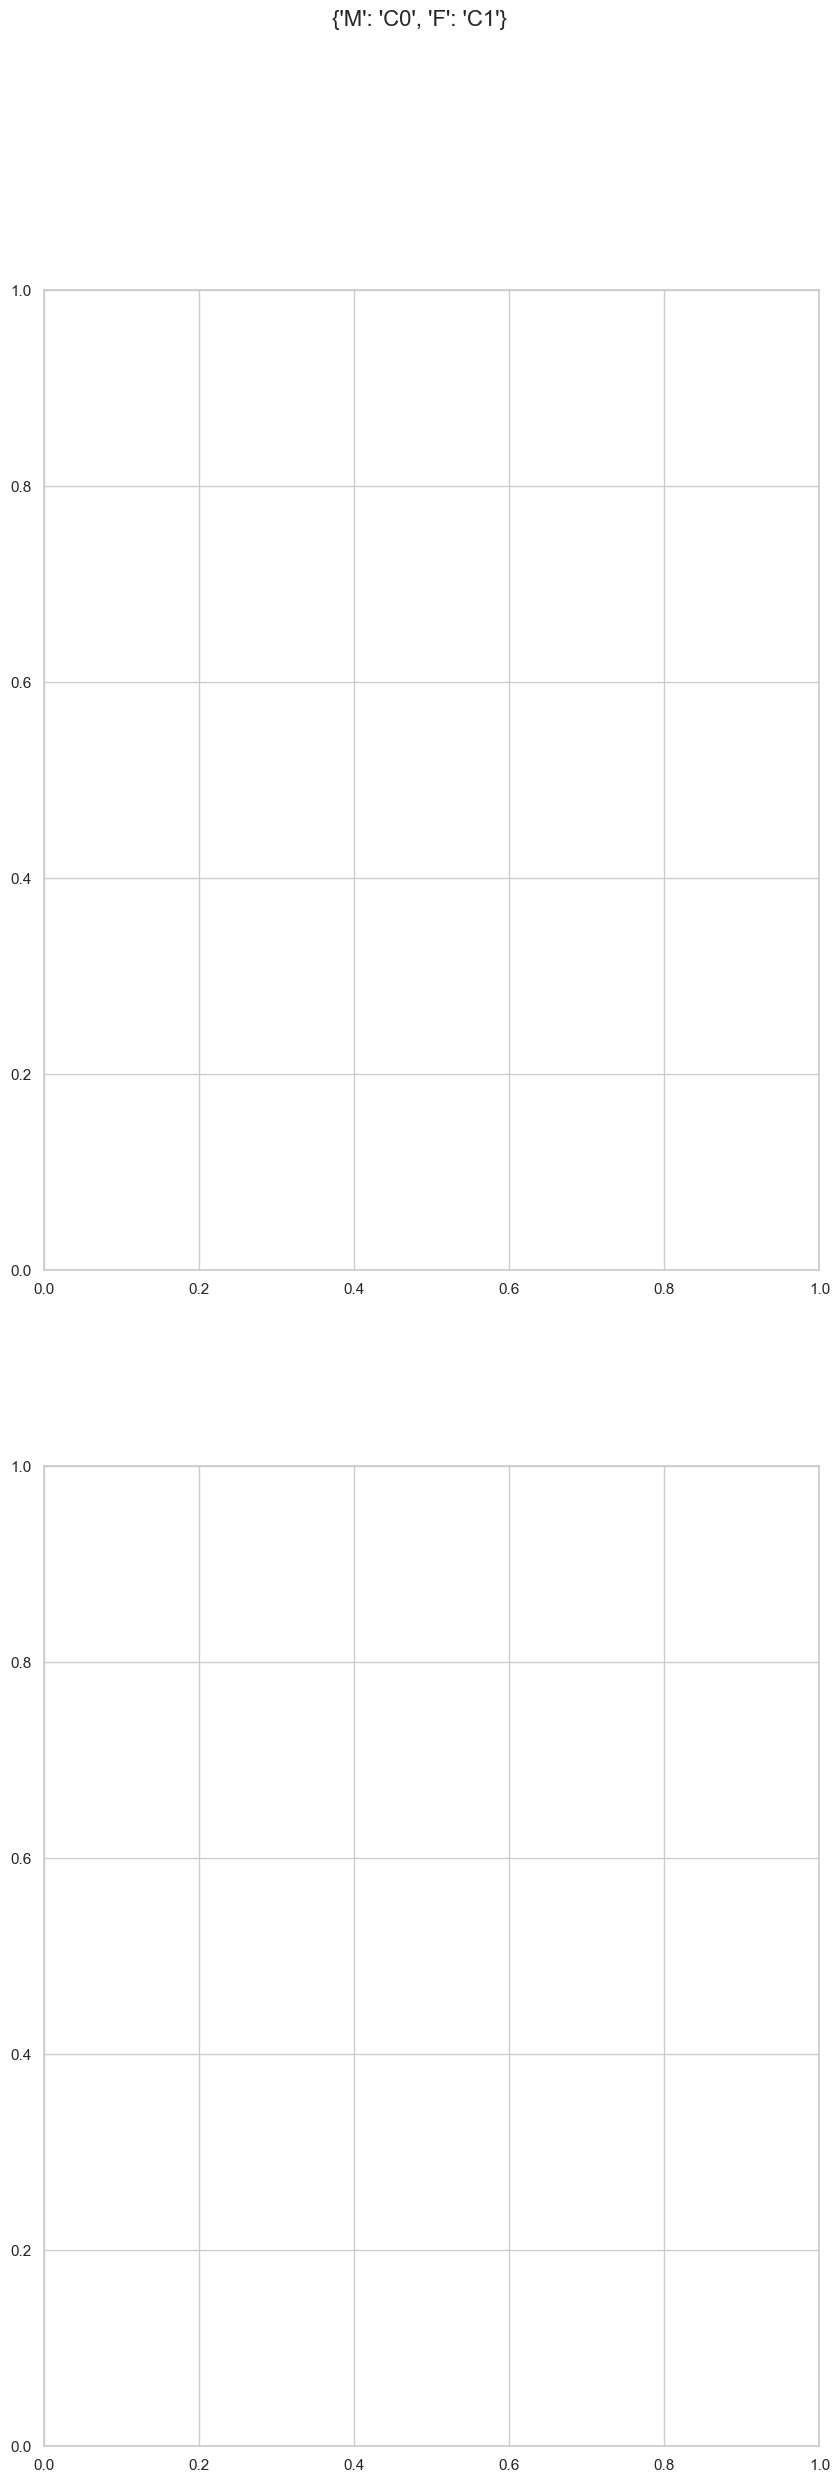

In [ ]:
comparative_bar_plots(ccomp, eng, 'ETNIA', palette, "Distribuição de Etnias")

In [ ]:
print('Ciência')
testa_dependencia(cc_tabper_etnia)
print('Engenharia')
testa_dependencia(eng_tabper_etnia)

## Estado Civil

### Geral

In [ ]:
df["ESTADO_CIVIL"].loc[df.ESTADO_CIVIL == "Separado(a) Judicialmente"] = "Separado(a) \n Judicialmente"

C:\Users\USER\AppData\Local\Temp\ipykernel_10100\3544449834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ESTADO_CIVIL"].loc[df.ESTADO_CIVIL == "Separado(a) Judicialmente"] = "Separado(a) \n Judicialmente"


In [ ]:
tab_estadocivil, tabper_estadocivil = crosstabper(df,"ESTADO_CIVIL")
tabper_estadocivil

SEXO,F,M
ESTADO_CIVIL,,
Casado(a),3.834808,5.250597
Divorciado(a),0.294985,0.238663
Outros,0.000000,0.095465
Separado(a) \n Judicialmente,0.294985,0.047733
Solteiro(a),94.985251,93.985680
Uniao Estavel,0.589971,0.381862


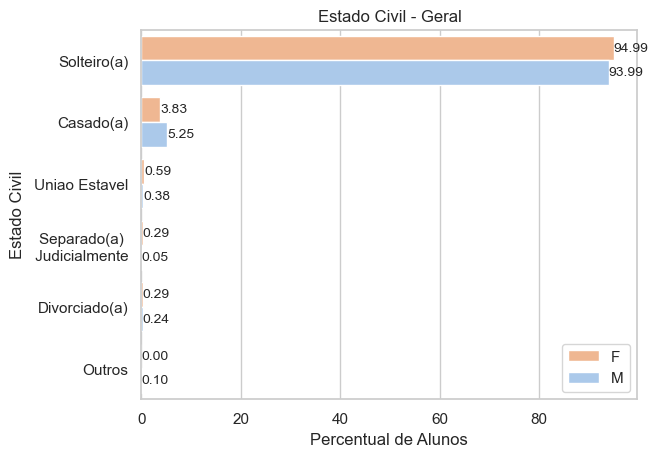

In [ ]:
single_bar_plot(df, 'ESTADO_CIVIL', 'Estado Civil - Geral',
                palette, ylabel='Estado Civil')

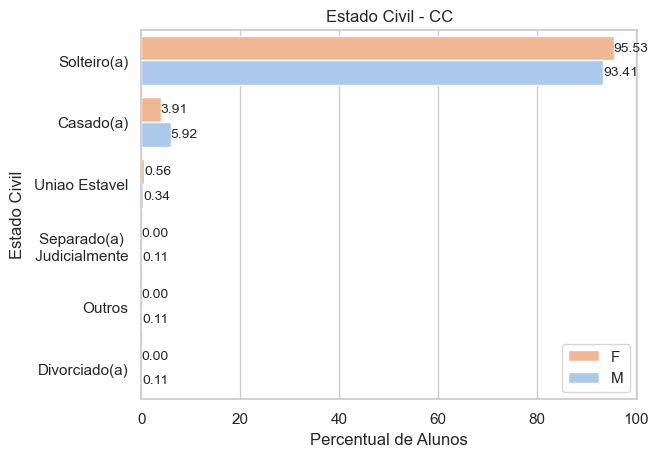

In [ ]:
single_bar_plot(ccomp, 'ESTADO_CIVIL', 'Estado Civil - CC',
                palette, ylabel='Estado Civil')

In [ ]:
testa_dependencia(tabper_estadocivil)

### Por curso

In [ ]:
eng_tab_estado_civil, eng_tabper_estado_civil = crosstabper(eng,"ESTADO_CIVIL")
eng_tabper_estado_civil

In [ ]:
cc_tab_estado_civil, cc_tabper_estado_civil = crosstabper(ccomp,"ESTADO_CIVIL")
cc_tabper_estado_civil

In [ ]:
comparative_bar_plots(df, eng, 'ESTADO_CIVIL', palette, ylabel='Estado Civil')

In [ ]:
print('Ciência')
testa_dependencia(cc_tabper_estado_civil)
print('Engenharia')
testa_dependencia(eng_tabper_estado_civil)

## Localização de Origem

In [ ]:
tab_municipio, tabper_municipio = crosstabper(df, 'MUNICIPIO')
cc_tab_municipio, cc_tabper_municipio = crosstabper(ccomp, 'MUNICIPIO')
ec_tab_municipio, ec_tabper_municipio = crosstabper(eng, 'MUNICIPIO')

print('Geral:')
testa_dependencia(tab_municipio)
print('Ciência:')
testa_dependencia(cc_tab_municipio)
print('Engenharia:')
testa_dependencia(ec_tab_municipio)

In [ ]:
tab_estado, tabper_estado = crosstabper(df, 'ESTADO')
cc_tab_estado, cc_tabper_estado = crosstabper(ccomp, 'ESTADO')
ec_tab_estado, ec_tabper_estado = crosstabper(eng, 'ESTADO')

print('Geral:')
testa_dependencia(tab_estado)
print('Ciência:')
testa_dependencia(cc_tab_estado)
print('Engenharia:')
testa_dependencia(ec_tab_estado)

In [ ]:
comparative_bar_plots(ccomp, eng, 'ESTADO', paleta=palette, 
                      maintitle='Estados de origem do Estudante Curso',)

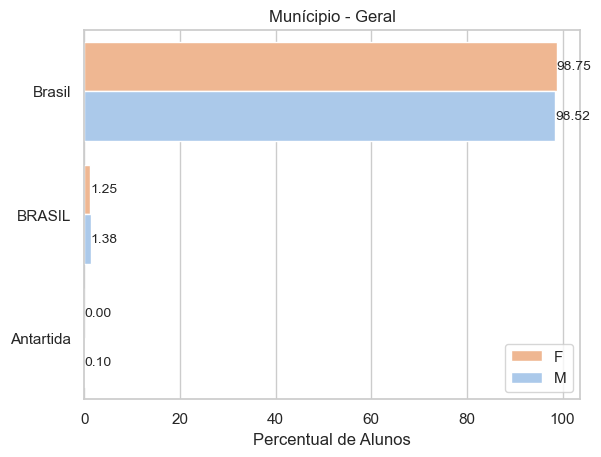

In [ ]:
single_bar_plot(df, 'PAIS', 'Munícipio - Geral',
                palette, ylabel='')

## Resumo

In [ ]:
categoricas = ['ESTADO_CIVIL', 'ETNIA', 'NOME_CURSO', 
               'FORMA_INGRESSO', 'FORMA_EVASAO', 'COTISTA', 
               'MUNICIPIO', 'ESTADO', 'PAIS']

In [ ]:
for coluna in categoricas:
    print(coluna)
    print("\n")
    print('Geral:')
    batch_testa_dependencia(df,coluna)
    print('Ciência:')
    batch_testa_dependencia(ccomp,coluna)
    print('Engenharia:')
    batch_testa_dependencia(eng,coluna)
    print("\n")

# Tempo na UFES

In [ ]:
formados.groupby("SEXO")["TEMPO_NA_UFES"].describe()

In [ ]:
formados_cc.groupby("SEXO")["TEMPO_NA_UFES"].describe()

In [ ]:
formados_ec.groupby("SEXO")["TEMPO_NA_UFES"].describe()